# COGS 118A: Supervised Machine Learning Algorithms
## Hyper-plane Estimation 

This Jupyter notebook contains starter codes for the Hyper-plane Estimation questions on my assignment that used the closed form solution, and using gradient descent. I used this notebook as a starting point to code the answers to the questions. The skeleton of the functions I needed to use were provided, and I just needed to fill the code where I was instructed to. 


In [65]:
# Importing Important packages (nothing to add to this cell)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'

In [66]:
# Loading the data (nothing to add to this cell)

X_and_Y = np.load('./hyperplane-estimation.npy')
X1 = X_and_Y[:, 0]    # Shape: (900,)
X2 = X_and_Y[:, 1]    # Shape: (900,)
Y  = X_and_Y[:, 2]    # Shape: (900,)
print(X1.shape, X2.shape, Y.shape)

(900,) (900,) (900,)


### Original Data

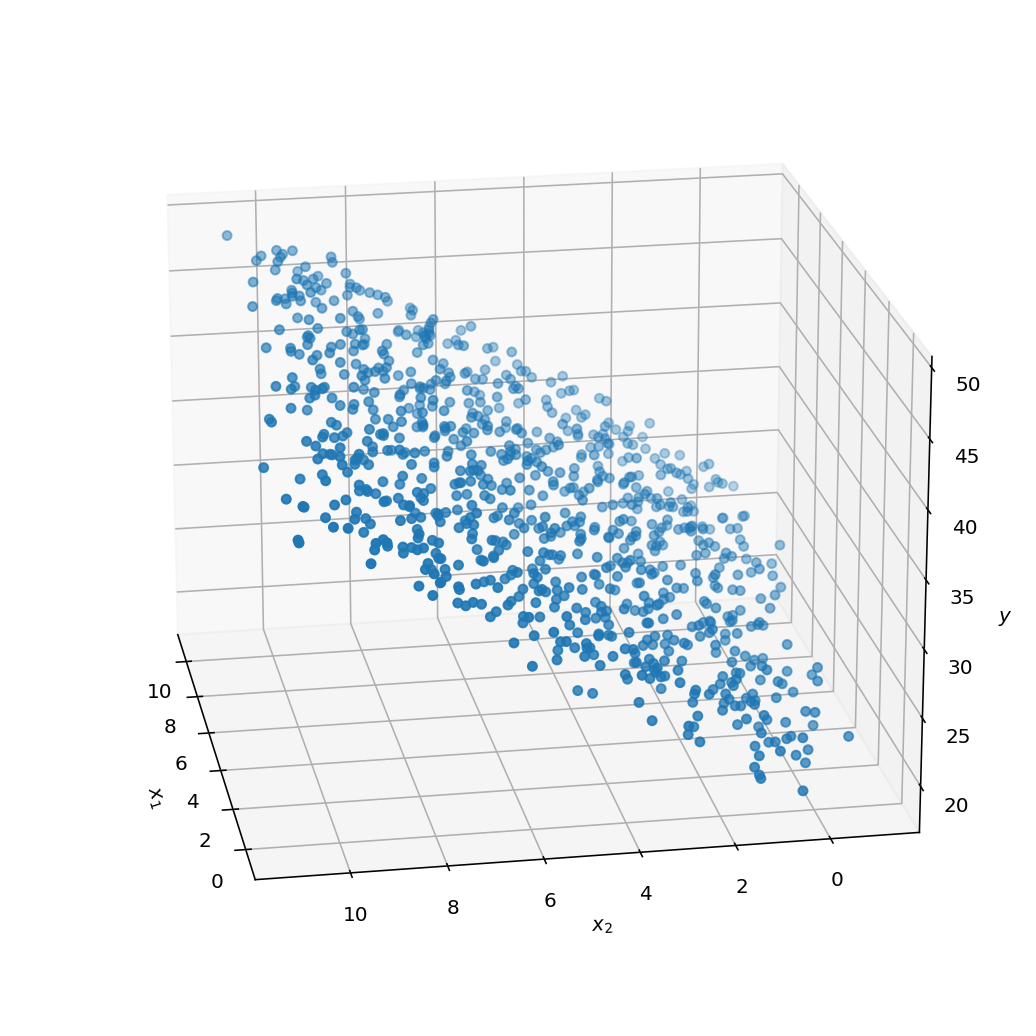

In [67]:
# Visualization of the original datapoints (nothing to add to this cell).

def vis(w0, w1, w2):
    draw_plane = (w0 is not None) and (w1 is not None) and (w2 is not None)
    if draw_plane:
        num = 30
        X_plane_range = np.linspace(0,10,num)
        X_plane_range = np.linspace(0,10,num)
        X1_plane, X2_plane = np.meshgrid(X_plane_range, X_plane_range)
        Y_plane = w0 + w1 * X1_plane + w2 * X2_plane

    fig = plt.figure(figsize = (7, 7))
    ax = Axes3D(fig, elev = 20, azim = 170)
    ax.scatter(X1, X2, Y)
    if draw_plane:
        ax.scatter(X1_plane, X2_plane, Y_plane)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')
    plt.show()
    
vis(None, None, None)

### Hyperplane Estimation Using the Closed Form Solution

Assume data points are represented as matrices $X$ and $Y$, please use the closed form solution to calculate the parameters $W$.


In [68]:
# Estimating W, which defines the hyperplane (you need to add code to this cell as indicated below).
# y = w0 + w1*x1 + w2*x2

X = np.matrix(np.hstack((np.ones((len(X1),1)),
                         X1.reshape(-1,1),
                         X2.reshape(-1,1))))  # X contains 1, X1 and X2.
Y = Y
# Compute W using the closed form solution.

W = np.dot((np.dot(((np.dot(X.T, X)).I), X.T)), Y)
#Hint: In the form of X and Y.

w0, w1, w2 = np.array(W).reshape(-1)
print('y = {:.2f} + {:.2f}*x1 + {:.2f}*x2'.format(w0, w1, w2))

y = 19.30 + 0.98*x1 + 1.94*x2


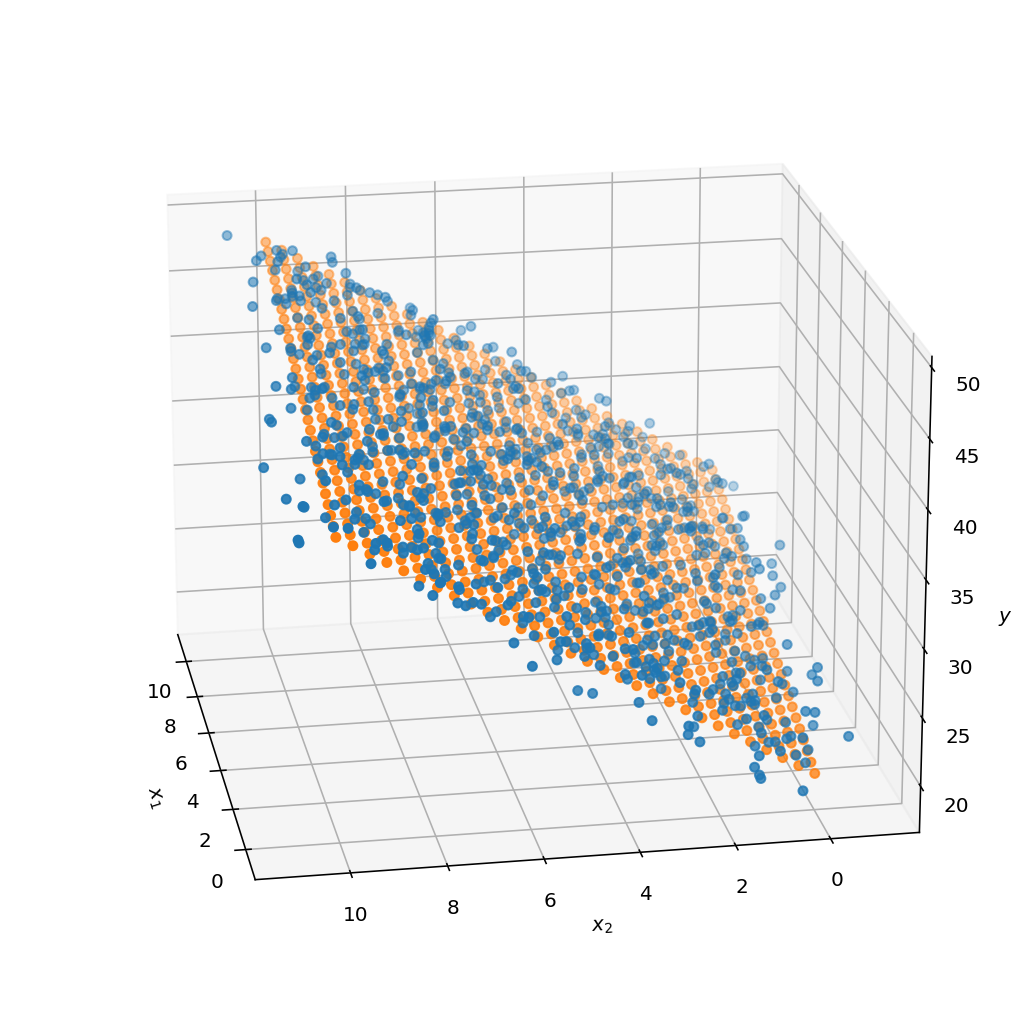

In [69]:
# Visualization of the original datapoints and estimated plane (nothing to add to this cell).

vis(w0, w1, w2)

### Hyperplane Estimation Using Gradient Descent

In this problem, we would like to use the gradient descent to calculate the parameters $W$ for the hyperplane.
If we have an error function (a.k.a objective function or loss function), then a typical gradient descent algorithm contains the following steps:

**Step 1**. Initialize the parameters W.

for i = 1 to #iterations:

- **Step 2**. Compute the gradient $\nabla \mathcal{L}(W) = \frac{\partial \mathcal{L}(W)}{\partial W}$.

- **Step 3**. Update the parameters $W \leftarrow \mathcal{L}(W) = W - \eta \frac{\partial \mathcal{L}(W)}{\partial W}$ where $\eta$ is the learning rate.

In [70]:
# Gradient of L(W) with respect to W (you need to add code to this cell as indicated below).

def grad_L_W(X, Y, W):
    
    return 2*(np.dot(np.dot(X.T, X), W)) - 2*(np.dot(X.T, Y))
    

    # Hint: implement Step 2 above!

In [71]:
# Estimating W, which defines the hyperplane (you need to add code to this cell as indicated below).
# y = w0 + w1*x1 + w2*x2

# Some settings.
Y = Y.reshape(-1, 1)
print(X.shape, Y.shape, W.shape)
iterations    = 20000
learning_rate = 0.000001

# Gradient descent algorithm.
# Step 1. Initialize the parameters W.
W = np.matrix(np.zeros((3,1)))

for i in range(iterations):
    # Step 2. Calculate the gradient of L(W) w.r.t. W. 
    grad = grad_L_W(X, Y, W)
    
    # Step 3. Update parameters W.
    W = W - learning_rate * grad
    #  Hint: Use grad, W, learning_rate to implement Step 3 above.
    
w0, w1, w2 = np.array(W).reshape(-1)
print('y = {:.2f} + {:.2f}*x1 + {:.2f}*x2'.format(w0, w1, w2))

(900, 3) (900, 1) (1, 3)
y = 19.22 + 0.99*x1 + 1.95*x2


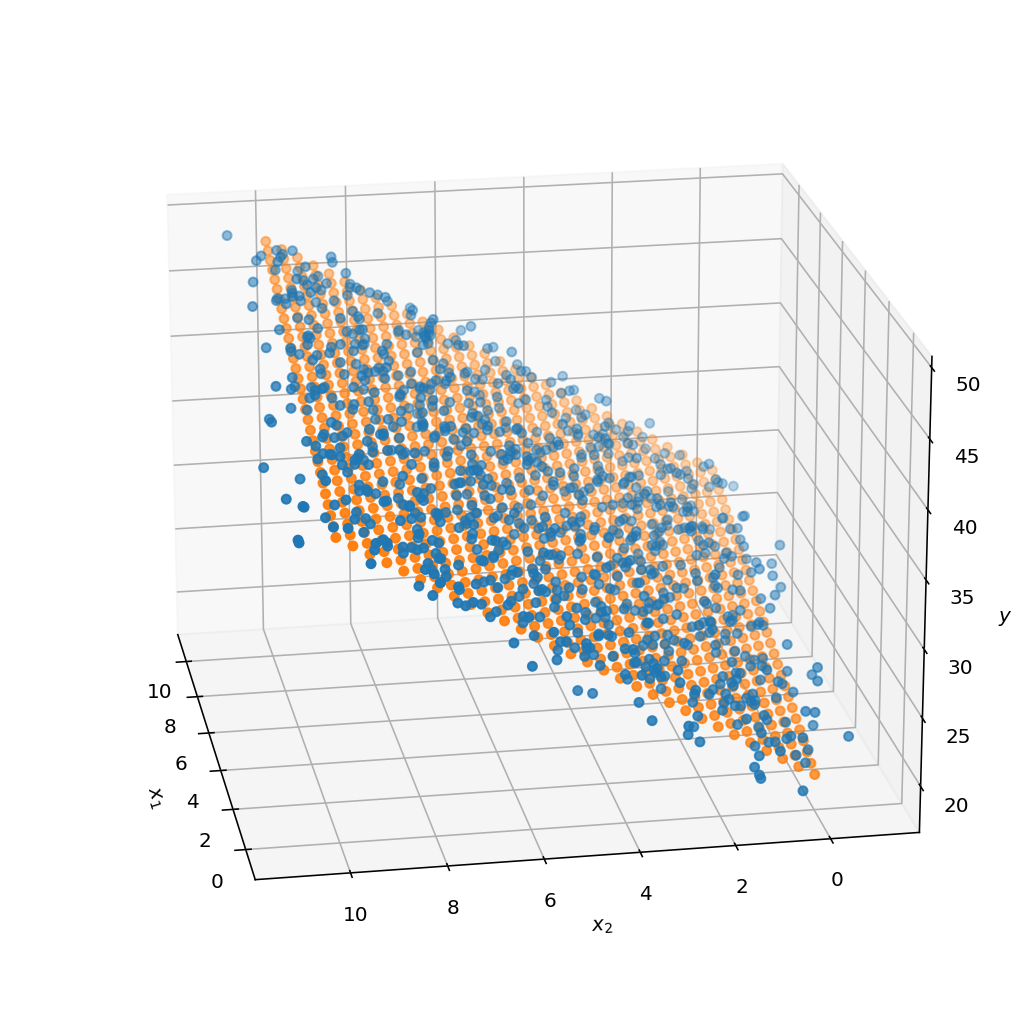

In [72]:
# of the original datapoints and estimated plane (nothing to add to this cell).

vis(w0, w1, w2)